In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import pandas as pd

In [2]:
fh = open("Edges_Net.txt", "rb")
G = nx.read_edgelist(fh, create_using=nx.DiGraph())
fh.close()

In [3]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("Density:", nx.density(G))
print("Strongly Conected Components: ", nx.number_strongly_connected_components(G))
print("Weakly Conected Components: ", nx.number_weakly_connected_components(G))

Nodes:  35776
Edges:  137821
Average degree:  3.8523311717352415
Density: 0.00010768221304640787
Strongly Conected Components:  24071
Weakly Conected Components:  497


In [4]:
in_degrees = dict(G.in_degree()) # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]

out_degrees = dict(G.out_degree()) # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]

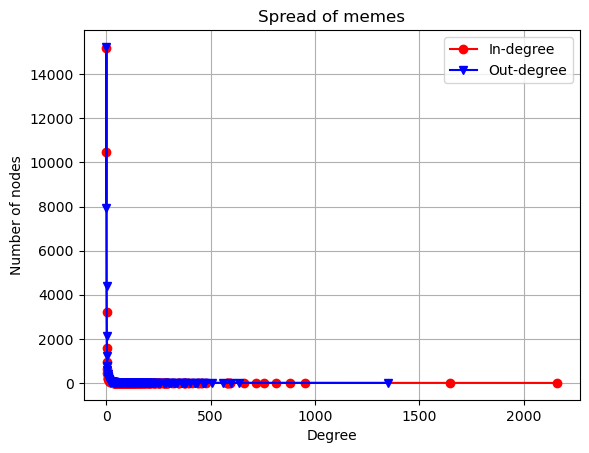

In [5]:
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-') # in-degree
plt.plot(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Spread of memes')
plt.show()

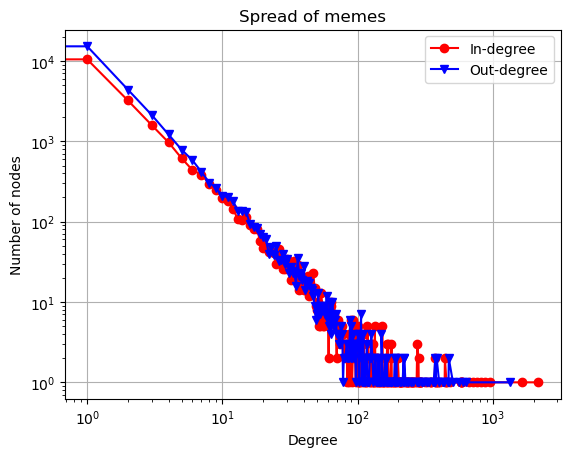

In [6]:
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Spread of memes')
plt.show()

In [51]:
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients = nx.clustering(G)

# Average clustering coefficient
avg_clust_coefficient = nx.average_clustering(G)
avg_clust_coefficient

0.13930612883615348

In [121]:
# Top 10 strongly connected components are sorted in descending order of their size
sizes_scc = [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
len(sizes_scc)

24071

In [7]:
from collections import Counter
Counter(sizes_scc)

NameError: name 'sizes_scc' is not defined

In [122]:
sizes_wcc = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]
len(sizes_wcc)

497

In [131]:
Counter(sizes_wcc)

Counter({34671: 1, 42: 1, 9: 1, 8: 1, 5: 7, 4: 3, 3: 33, 2: 450})

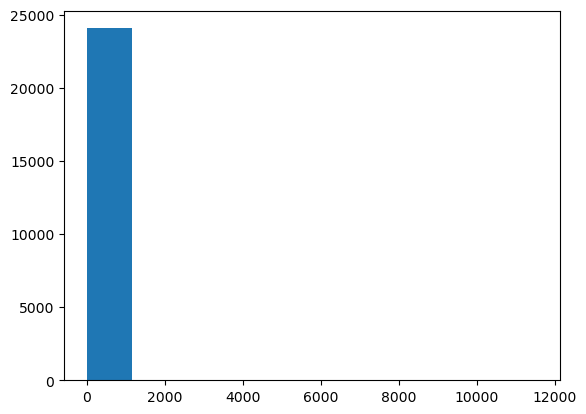

In [126]:
plt.hist(sizes_scc)
plt.show()

In [8]:
# G_components = (G.subgraph(c) for c in nx.strongly_connected_components(G))
l_G = G.subgraph(max(nx.strongly_connected_components(G), key=len))
l_G

In [9]:
l_N, l_K = l_G.order(), l_G.size()
l_avg_deg = float(l_K) / l_N
print("Nodes: ", l_N)
print("Edges: ", l_K)
print("Average degree: ", l_avg_deg)

Nodes:  11564
Edges:  98166
Average degree:  8.488931165686614


In [47]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(l_G)
print(bet_cen)

KeyboardInterrupt: 

In [132]:
# Closeness centrality
clo_cen = nx.closeness_centrality(l_G)
print(clo_cen)

{'484': 0.3507446840780174, '2105': 0.23755521314843348, '24043': 0.23383688244453882, '16899': 0.26357419648962843, '6625': 0.25950446608914224, '11862': 0.2324454719067243, '4588': 0.16801069409935632, '13888': 0.2633400897310346, '13': 0.37493514915693904, '6056': 0.2712154618379697, '5949': 0.24175203846957977, '5548': 0.2749167855444603, '11324': 0.25499492788779604, '9410': 0.21046213210534936, '2684': 0.31619677869233503, '16216': 0.218330469590831, '8537': 0.26705004734520427, '8959': 0.3107915602741567, '3233': 0.27989446165762977, '9021': 0.2334733271412995, '3985': 0.2766996099452009, '17624': 0.18016235334444775, '4842': 0.24384740293974988, '33587': 0.26837023627164275, '8304': 0.25585254679824754, '4107': 0.21874349709615784, '7328': 0.23451031293731114, '4496': 0.31989708404802747, '15455': 0.2622649640499898, '13884': 0.244750656167979, '7070': 0.2784051236366263, '29898': 0.27438836287700813, '24563': 0.24133324984868407, '21675': 0.2802947664412285, '31861': 0.2312923

In [137]:
clo_cen_round = [round(x, 3) for x in clo_cen.values()]

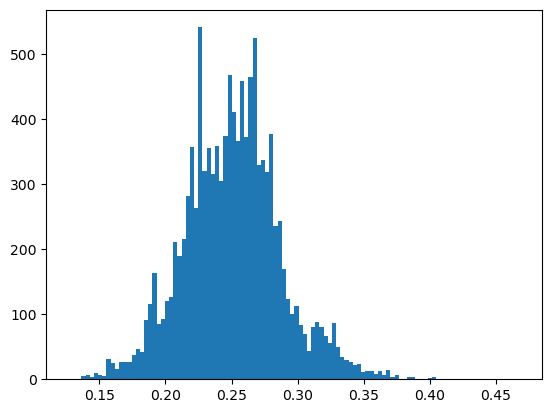

In [144]:
plt.hist(clo_cen_round, bins=round(math.sqrt(len(clo_cen_round))))
plt.show()

In [49]:
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(l_G)
print(eig_cen)

{'484': 0.03250613758892956, '2105': 0.00021785579791205295, '24043': 0.00021711122665774333, '16899': 0.0010071930018010946, '6625': 0.0011200549417129668, '11862': 0.00011957009556184894, '4588': 1.9674166324354828e-07, '13888': 0.0011128259726690673, '13': 0.08880205871904667, '6056': 0.0013746697395766744, '5949': 0.0003889340673924406, '5548': 0.0022185041944968306, '11324': 0.0006131459848683412, '9410': 3.3771812407672824e-05, '2684': 0.008069840690518871, '16216': 5.5347980415057946e-05, '8537': 0.0014627378194187498, '8959': 0.013699230828599333, '3233': 0.002018892023862151, '9021': 0.00019258452864802015, '3985': 0.0022883610236175854, '17624': 9.769625487657271e-07, '4842': 0.00038153784762827805, '33587': 0.0012966739673705896, '8304': 0.0007457963472687342, '4107': 6.282397868876883e-05, '7328': 0.00018476304082421535, '4496': 0.008421167060975291, '15455': 0.001545011242664864, '13884': 0.00021654750070636066, '7070': 0.0026254118258835827, '29898': 0.0026821863601133233

In [142]:
eig_cen_round = [round(x, 3) for x in eig_cen.values()]

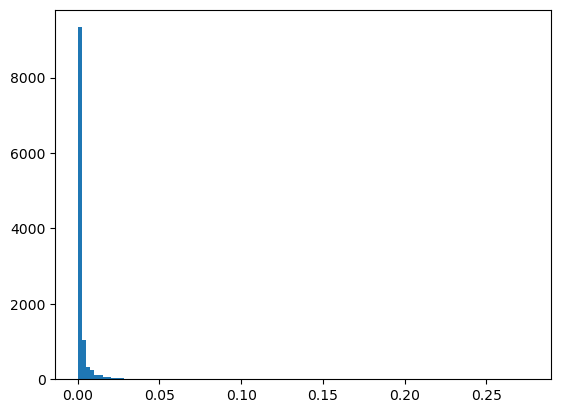

<Figure size 4000x4000 with 0 Axes>

In [143]:
plt.hist(eig_cen_round, bins=round(math.sqrt(len(eig_cen_round))))
plt.figure(figsize=(40,40))
plt.show()

In [52]:
clust_coefficients

{'0': 0.016873410449678553,
 '1': 0.2871287128712871,
 '379': 0.2524271844660194,
 '41': 0.011341298068611588,
 '810': 0.0319660014781966,
 '852': 0.125,
 '386': 0.05555555555555555,
 '1430': 0,
 '1264': 0.02603112840466926,
 '2232': 0.13157894736842105,
 '11': 0.020771617999717874,
 '2880': 0.7222222222222222,
 '747': 0.04515115186469235,
 '1001': 0.09761904761904762,
 '809': 0.05560953491384894,
 '59': 0.009607743861339679,
 '691': 0.1064385150812065,
 '3453': 0.050682261208576995,
 '3498': 0,
 '3682': 0.175,
 '2980': 1.0,
 '1106': 0.06444298389746961,
 '224': 0.0275954499105491,
 '28': 0.04090000382005017,
 '286': 0.06337209302325582,
 '2279': 0,
 '2108': 0.1183489827856025,
 '90': 0.04289372599231754,
 '122': 0.016268064694668224,
 '160': 0.031669189414896395,
 '336': 0.08020050125313283,
 '1461': 0.08772887110464411,
 '6612': 1.0,
 '325': 0.035822825304577324,
 '6822': 0,
 '6474': 0.6111111111111112,
 '3439': 0.08004926108374384,
 '393': 0.18716216216216217,
 '263': 0.037463343108

In [53]:
out_degrees

{'0': 256,
 '1': 11,
 '379': 5,
 '41': 384,
 '810': 0,
 '852': 6,
 '386': 3,
 '1430': 1,
 '1264': 52,
 '2232': 1,
 '11': 301,
 '2880': 1,
 '747': 121,
 '1001': 3,
 '809': 0,
 '59': 363,
 '691': 57,
 '3453': 43,
 '3498': 1,
 '3682': 3,
 '2980': 1,
 '1106': 23,
 '224': 226,
 '28': 141,
 '286': 18,
 '2279': 1,
 '2108': 0,
 '90': 39,
 '122': 1350,
 '160': 0,
 '336': 1,
 '1461': 36,
 '6612': 0,
 '325': 103,
 '6822': 1,
 '6474': 2,
 '3439': 0,
 '393': 13,
 '263': 101,
 '1385': 38,
 '385': 36,
 '3046': 189,
 '7891': 1,
 '6417': 2,
 '657': 171,
 '765': 97,
 '195': 77,
 '55': 40,
 '6416': 3,
 '3': 110,
 '205': 55,
 '9101': 0,
 '3316': 14,
 '9411': 6,
 '683': 54,
 '9514': 2,
 '8836': 1,
 '9818': 0,
 '182': 69,
 '10030': 0,
 '166': 3,
 '2931': 0,
 '362': 63,
 '190': 6,
 '3229': 20,
 '1243': 12,
 '5169': 1,
 '2901': 5,
 '136': 8,
 '2284': 3,
 '317': 117,
 '15': 5,
 '6205': 49,
 '700': 7,
 '882': 37,
 '973': 40,
 '4628': 18,
 '11926': 0,
 '797': 73,
 '6': 75,
 '5694': 1,
 '209': 83,
 '992': 9,
 '76

In [94]:
sum(out_degrees.values())

137821

In [110]:
out_degree_set = list(set(out_degrees.values()))
len(out_degree_set)

189

In [111]:
avg_clus_out_degree = []
for o in out_degree_set:
    nodes_list = list(filter(lambda x: out_degrees[x] == o, out_degrees))
    clust_coeffs = []
    for n in nodes_list:
        clust_coeffs.append(clust_coefficients[n])
    avg_temp = sum(clust_coeffs)/len(clust_coeffs)
#     print(sum(clust_coeffs), len(clust_coeffs), avg_temp)
    avg_clus_out_degree.append(avg_temp)
    
len(avg_clus_out_degree)

189

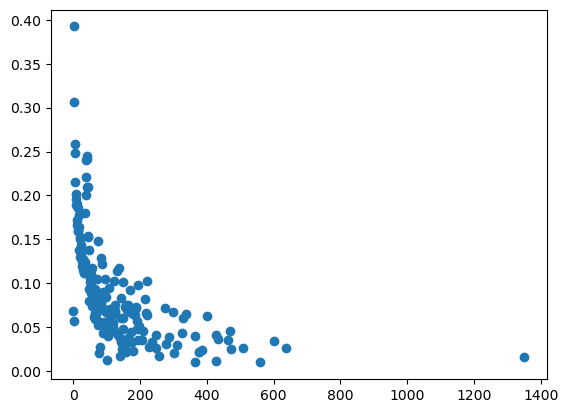

In [70]:
plt.plot(out_degree_set, avg_clus_out_degree, 'o')
plt.show()

In [107]:
in_degree_set = list(set(in_degrees.values()))
len(in_degree_set)

224

In [108]:
avg_clus_in_degree = []
for i in in_degree_set:
    nodes_list = list(filter(lambda x: in_degrees[x] == i, in_degrees))
    clust_coeffs = []
    for n in nodes_list:
        clust_coeffs.append(clust_coefficients[n])
    avg_temp = sum(clust_coeffs)/len(clust_coeffs)
#     print(sum(clust_coeffs), len(clust_coeffs), avg_temp)
    avg_clus_in_degree.append(avg_temp)
    
len(avg_clus_in_degree)

224

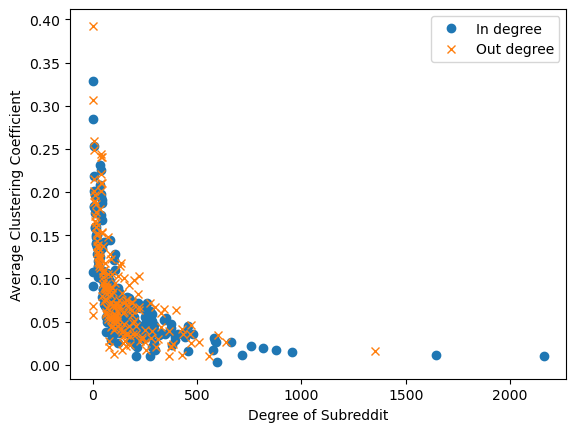

In [128]:
plt.loglog(in_degree_set, avg_clus_in_degree, 'o', label='In degree')
plt.loglog(out_degree_set, avg_clus_out_degree, 'x', label='Out degree')
plt.xlabel('Degree of Subreddit')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.show()

In [101]:
cummulative_out_users = [0]
count_out_users = 0
cummulative_out_links = [0]
count_out_links = 0
out_degree_set.reverse()
for o in out_degree_set:
    nodes_list = list(filter(lambda x: out_degrees[x] == o, out_degrees))
    for n in nodes_list:
        count_out_users += 1
        cummulative_out_users.append(count_out_users/35776)
        count_out_links += int(o)
        cummulative_out_links.append(count_out_links/137821)
        
print(count_out_users, count_out_links)
print(len(cummulative_out_users), len(cummulative_out_links))    

35776 137821
35777 35777


In [99]:
cummulative_in_users = [0]
count_in_users = 0
cummulative_in_links = [0]
count_in_links = 0
in_degree_set.reverse()
for i in in_degree_set:
    nodes_list = list(filter(lambda x: in_degrees[x] == i, in_degrees))
    for n in nodes_list:
        count_in_users += 1
        cummulative_in_users.append(count_in_users/35776)
        count_in_links += int(i)
        cummulative_in_links.append(count_in_links/137821)
        
print(count_in_users, count_in_links)
print(len(cummulative_in_users), len(cummulative_in_links))

35776 137821
35777 35777


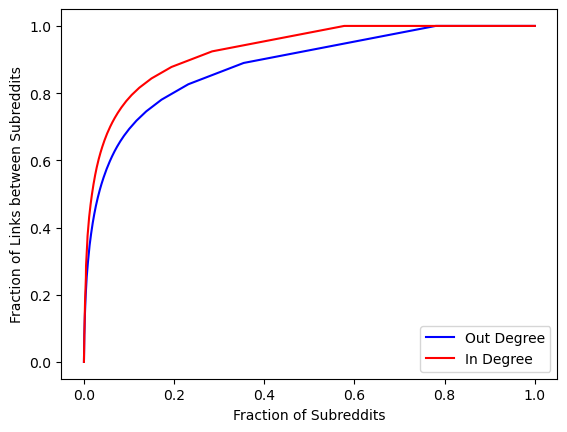

In [104]:
plt.plot(cummulative_out_users, cummulative_out_links, 'b', label='Out Degree')
plt.plot(cummulative_in_users, cummulative_in_links, 'r', label='In Degree')
plt.xlabel('Fraction of Subreddits')
plt.ylabel('Fraction of Links between Subreddits')
plt.legend()
plt.show()

In [118]:
assort_in_out=nx.degree_assortativity_coefficient(G, 'in', 'out')
assort_in_out

-0.030688012893163776

In [119]:
assort_out_in=nx.degree_assortativity_coefficient(G, 'out', 'in')
assort_out_in

-0.08020684588859893

In [10]:
df = pd.read_csv(r'/Users/eleanor/Documents/Study/Digital Media and Social Networks/PG_19 Project/Network_edges/Nodes_Network_Stats_Mod_1.csv')
df = df.set_index('Id')
print(df)

       Label  Eccentricity  closnesscentrality  harmonicclosnesscentrality  \
Id                                                                           
0        NaN             7            0.335777                    0.362346   
1        NaN             8            0.252292                    0.262687   
379      NaN             8            0.259680                    0.271019   
41       NaN             7            0.354032                    0.384665   
810      NaN             0            0.000000                    0.000000   
...      ...           ...                 ...                         ...   
35771    NaN            10            0.179231                    0.183003   
35772    NaN             1            1.000000                    1.000000   
35773    NaN             0            0.000000                    0.000000   
35774    NaN            10            0.173773                    0.176850   
35775    NaN             0            0.000000                  

In [146]:
df['betweenesscentrality']

0        0.012105
1        0.000041
2        0.000038
3        0.044145
4        0.000000
           ...   
35771    0.000000
35772    0.000000
35773    0.000000
35774    0.000000
35775    0.000000
Name: betweenesscentrality, Length: 35776, dtype: float64

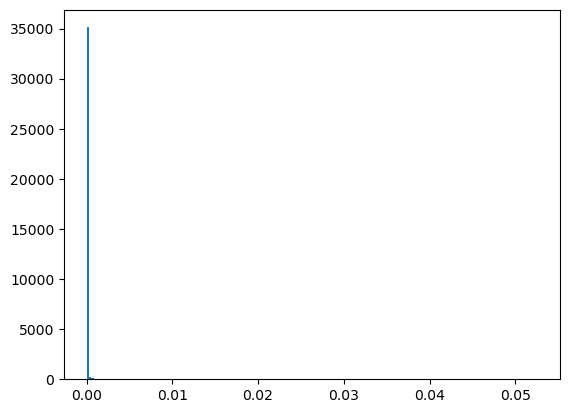

In [147]:
plt.hist(df['betweenesscentrality'], bins=round(math.sqrt(35776)))
plt.show()

In [17]:
df['betweenesscentrality'].sort_values(ascending=True)[:10]

Id
35775    0.0
31738    0.0
14682    0.0
14075    0.0
13832    0.0
13829    0.0
22309    0.0
13827    0.0
19616    0.0
13823    0.0
Name: betweenesscentrality, dtype: float64

In [18]:
df['closnesscentrality'].sort_values(ascending=True)[:10]

Id
35775    0.0
4629     0.0
4653     0.0
10674    0.0
32281    0.0
11094    0.0
34956    0.0
11600    0.0
4180     0.0
11855    0.0
Name: closnesscentrality, dtype: float64

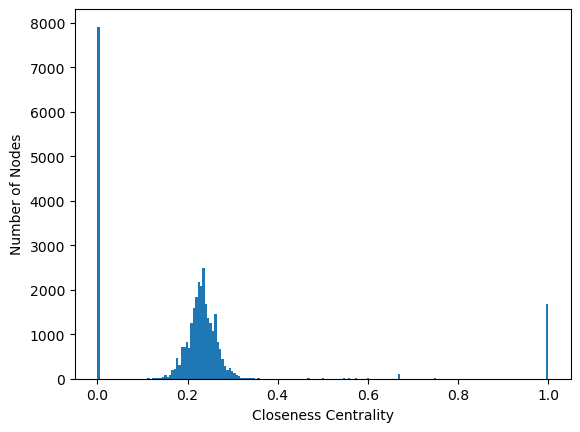

In [155]:
plt.hist(df['closnesscentrality'], bins=round(math.sqrt(35776)))
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

In [16]:
df['eigencentrality'].sort_values(ascending=True)[:10]

Id
21099    0.0
17247    0.0
1128     0.0
17245    0.0
17244    0.0
17242    0.0
17241    0.0
17237    0.0
17236    0.0
17230    0.0
Name: eigencentrality, dtype: float64

In [14]:
modularity_class_set = set(df['modularity_class'])
print(len(modularity_class_set))
props_mod = ['closnesscentrality', 'betweenesscentrality', 'eigencentrality', 'clustering', 'indegree', 'outdegree']
modularity_class_vals = np.empty((0,7), float)
for i in modularity_class_set:
    df_1 = df[(df['modularity_class'] == i)]
    avg_df_1 = df_1.mean(axis=0)
    avg_arr = [i]
    for j in props_mod:
        avg_arr.append(avg_df_1[j])
    modularity_class_vals = np.append(modularity_class_vals, np.array([avg_arr]), axis=0)
    
modularity_class_vals.shape

543


(543, 7)

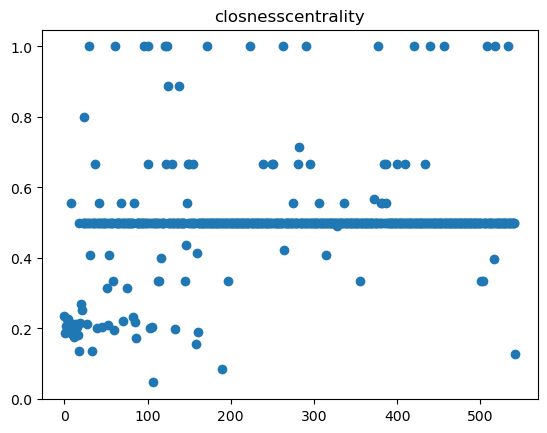

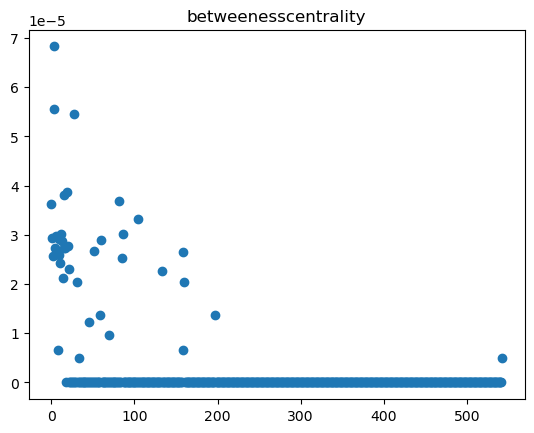

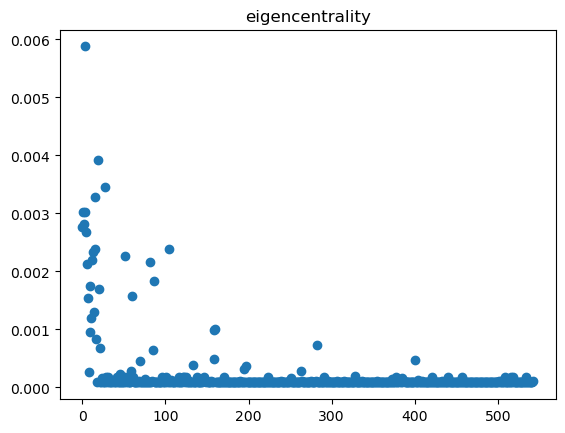

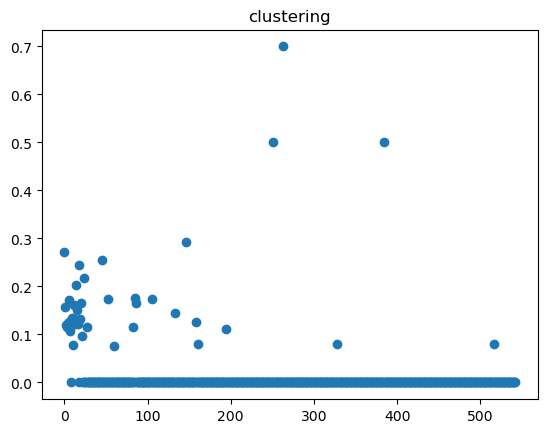

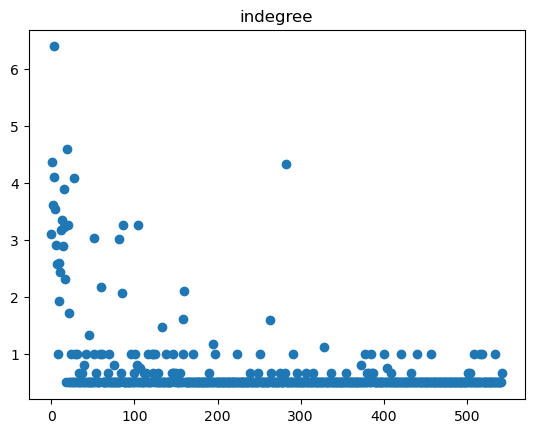

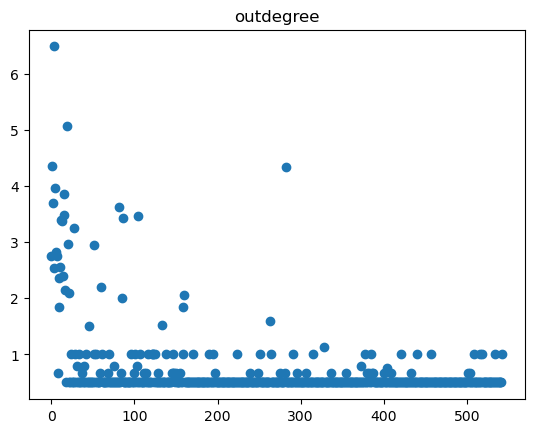

In [57]:
# closnesscentrality
for i in range(len(props_mod)):
    plt.plot(modularity_class_vals[:, 0], modularity_class_vals[:, i+1], 'o')
    plt.title(props_mod[i])
    plt.show()

Average closeness centrality is 0.5 - small number of communities with low closeness have more nodes
Low modularity - more nodes - high betweeness centrality - more dense
Less neighbours more clustering and vice versa; memes will spread quickly in a smaller closed group of subreddits, as compared larger community of subreddits that have low clustering but many neighbours 

In [68]:
largest_modularities = [4, 15, 19, 6, 1]

In [69]:
nodes_comm = {}


nodes_df_1 = df_1.index
edges_within = []
for m in largest_modularities:
    edges_across = []
    for i, j in G.edges():
        if int(i) in nodes_df_1 and int(j) in nodes_df_1:
            edges_within.append((i, j))
        if int(i) in nodes_df_1:
            edges_across.append((i, j))

nodes_comm[m] = {'nodes': nodes_df_1, 'edges_within': edges_within, 'edges_across': edges_across}

In [70]:
largest_comm_nodes = []
indi_comm_nodes = {}
rand_node = []
for m in largest_modularities:
    df_1 = df[(df['modularity_class'] == m)]
    rand_node.append((df_1.index[1], m))
    largest_comm_nodes.extend(df_1.index)
    indi_comm_nodes[m] = df_1.index
    
print(rand_node)
len(largest_comm_nodes)

[(2108, 4), (1001, 15), (1385, 19), (2279, 6), (3, 1)]


18397

In [71]:
largest_comm_edges = []
for i, j in G.edges():
    if int(i) in largest_comm_nodes and int(j) in largest_comm_nodes:
        largest_comm_edges.append((int(i), int(j)))
        
largest_comm_edges

[(386, 6041),
 (747, 36),
 (747, 1067),
 (747, 806),
 (747, 1007),
 (747, 4288),
 (747, 2419),
 (747, 5846),
 (747, 3982),
 (747, 7293),
 (747, 6243),
 (747, 691),
 (747, 7535),
 (747, 6480),
 (747, 8183),
 (747, 224),
 (747, 28),
 (747, 5501),
 (747, 3970),
 (747, 205),
 (747, 97),
 (747, 10034),
 (747, 515),
 (747, 130),
 (747, 34),
 (747, 249),
 (747, 42),
 (747, 14022),
 (747, 14253),
 (747, 369),
 (747, 6601),
 (747, 10973),
 (747, 1739),
 (747, 16752),
 (747, 16685),
 (747, 17080),
 (747, 1818),
 (747, 122),
 (747, 17013),
 (747, 491),
 (747, 156),
 (747, 17693),
 (747, 6205),
 (747, 3),
 (747, 14092),
 (747, 55),
 (747, 20785),
 (747, 14064),
 (747, 19104),
 (747, 393),
 (747, 165),
 (747, 11288),
 (747, 155),
 (747, 13258),
 (747, 529),
 (747, 12541),
 (747, 19567),
 (747, 2588),
 (747, 22164),
 (747, 2376),
 (747, 8355),
 (747, 22384),
 (747, 182),
 (747, 14693),
 (747, 1310),
 (747, 24094),
 (747, 3015),
 (747, 443),
 (747, 22248),
 (747, 166),
 (747, 24827),
 (747, 25096),
 

In [72]:
largest_G = nx.Graph()
largest_G.add_nodes_from(largest_comm_nodes)
largest_G.add_edges_from(largest_comm_edges)

In [9]:
# !pip install EoN

In [21]:
import EoN

# set the transmission and recovery rates
beta = 0.3
gamma = 0.1

Community: 4
Starting Infected Node: 2108
Overall number of infected nodes: 15528
4 4891
15 4431
19 2313
6 2345
1 1549


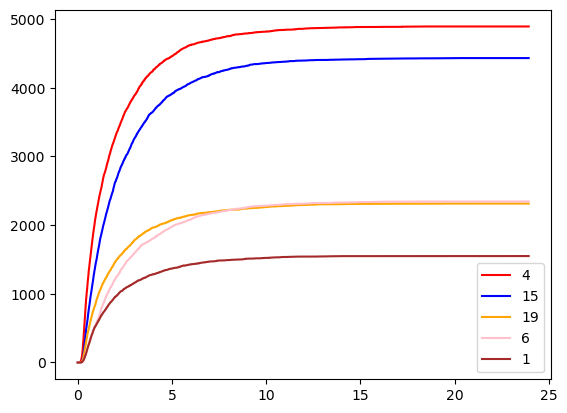

---------------------------
Community: 15
Starting Infected Node: 1001
Overall number of infected nodes: 15707
4 5046
15 4360
19 2415
6 2345
1 1542


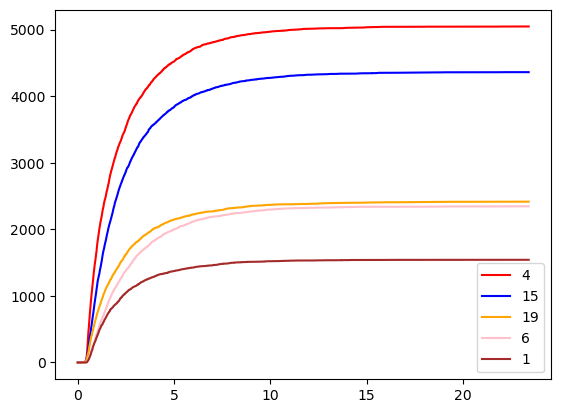

---------------------------
Community: 19
Starting Infected Node: 1385
Overall number of infected nodes: 15429
4 4799
15 4449
19 2350
6 2330
1 1502


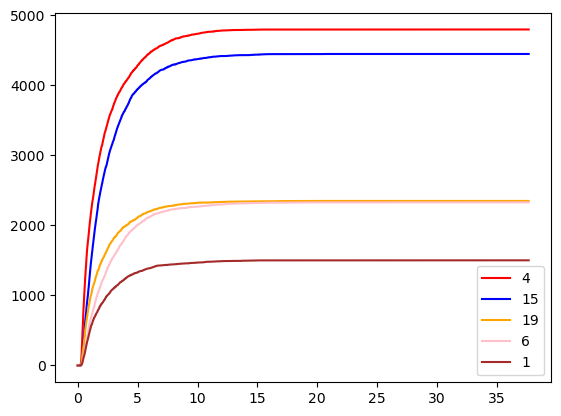

---------------------------
Community: 6
Starting Infected Node: 2279
Overall number of infected nodes: 15083
4 4952
15 4307
19 2341
6 1876
1 1608


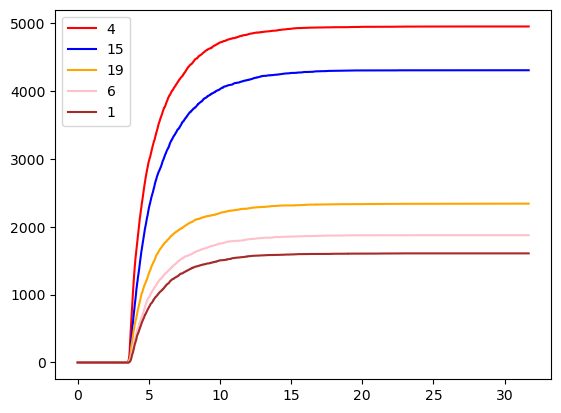

---------------------------
Community: 1
Starting Infected Node: 3
Overall number of infected nodes: 15513
4 4850
15 4444
19 2449
6 2280
1 1491


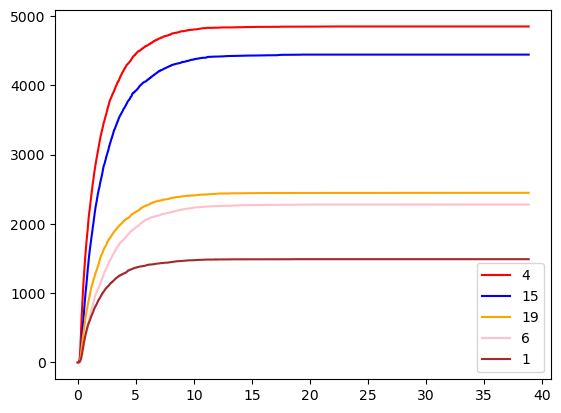

---------------------------


In [22]:
from collections import Counter

comms_colors = ['red', 'blue', 'orange', 'pink', 'brown']
# run the SI model 10 times starting from the most central node
for j, k in rand_node:
    for i in range(1):
        infected = [j]
        full_data = EoN.fast_SIR(largest_G, beta, gamma, initial_infecteds=infected, return_full_data=True)
        #print(full_data)
        ##full_data.display(time=0.1)
        #print(full_data.transmissions())
        raw = full_data.transmissions()
        #plt.show()
        # print(t)
        # print(len(t))
        # print(S)
        # print(len(S))
        # print(I)
        # print(len(I))
        # print(R)
        # print(len(R))
        time = []
        infected = []
        distance = []
        comms = []
        no_infected = {}
        for m in largest_modularities:
            if m == k:
                no_infected[m] = {'num_of_nodes': [1], 'time': [0], 'nodes': [j], 'time_nodes': [0]}
            else:
                no_infected[m] = {'num_of_nodes': [0], 'time': [0], 'nodes': [], 'time_nodes': []}

        for single in raw:
            for m in largest_modularities:
                if single[2] in indi_comm_nodes[m]:
                    comms.append(m)
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l+1)
                    no_infected[m]['time'].append(single[0])
                    no_infected[m]['nodes'].append(single[2])
                    no_infected[m]['time_nodes'].append(single[0])
                    
                else:
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l)
                    no_infected[m]['time'].append(single[0])
                    
            time.append(single[0])
            infected.append(single[2])
            distance.append(nx.shortest_path_length(largest_G, source=infected[0], target=single[2]))
            
                    
        print("Community:", k)
        print("Starting Infected Node:", j)
        print("Overall number of infected nodes:", len(infected))
#         print(distance[:10])
#         print(time[-1])
        comms_recounted = Counter(comms)
#         plt.bar(comms_recounted.keys(), comms_recounted.values())
        for i in range(len(largest_modularities)):
            print(largest_modularities[i], no_infected[largest_modularities[i]]['num_of_nodes'][-1])
            plt.plot(no_infected[largest_modularities[i]]['time'], 
                     no_infected[largest_modularities[i]]['num_of_nodes'], 
                     comms_colors[i], label=largest_modularities[i]
                    )

#         plt.scatter(time, distance, c=comms)
        
        plt.legend()
        plt.show()
        print('---------------------------')

In [45]:
# random_G = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), seed=1, directed=True)
random_G = nx.erdos_renyi_graph(G.number_of_nodes(), nx.density(G), seed=1, directed=True)

In [46]:
nx.write_edgelist(random_G, "random_edges_1.csv")

In [44]:
nx.write_gexf(random_G, "random_g_test.gexf")

In [2]:
df_r = pd.read_csv(r'/Users/eleanor/Documents/Study/Digital Media and Social Networks/PG_19 Project/Network_edges/Nodes_Network_Stats_Random_G_mod.csv')
df_r = df_r.set_index('Id')
print(df_r)

       Label  modularity_class  indegree  outdegree  Degree  \
Id                                                            
0          0                45         2          2       4   
1          1                18         2          5       7   
2          2                25         1          5       6   
3          3                 2         9          8      17   
4          4                41         4          4       8   
...      ...               ...       ...        ...     ...   
35771  35771                53         0          5       5   
35772  35772                49         5          3       8   
35773  35773                24         2          3       5   
35774  35774                45         4          2       6   
35775  35775                23         4          5       9   

       weighted indegree  weighted outdegree  Weighted Degree  Eccentricity  \
Id                                                                            
0                     

In [3]:
largest_modularities_r = [62, 45, 55, 25, 42]

In [4]:
largest_comm_nodes_r = []
indi_comm_nodes_r = {}
rand_node_r = []
for m in largest_modularities_r:
    df_1 = df_r[(df_r['modularity_class'] == m)]
    rand_node_r.append((df_1.index[0], m))
    largest_comm_nodes_r.extend(df_1.index)
    indi_comm_nodes_r[m] = df_1.index
    
print(rand_node_r)
len(largest_comm_nodes_r)

[(9, 62), (0, 45), (5, 55), (2, 25), (6, 42)]


6307

In [5]:
G_r = nx.readwrite.read_gexf("random_g_test.gexf")
len(G_r.edges())

137821

In [6]:
largest_comm_edges_r = []
for i, j in G_r.edges():
    if int(i) in largest_comm_nodes_r and int(j) in largest_comm_nodes_r:
        largest_comm_edges_r.append((int(i), int(j)))
        
largest_comm_edges_r

[(0, 24050),
 (2, 28012),
 (5, 10945),
 (6, 5187),
 (6, 29855),
 (6, 24475),
 (6, 7716),
 (7, 3308),
 (9, 29618),
 (9, 338),
 (25, 8232),
 (30, 13723),
 (33, 16884),
 (37, 7272),
 (37, 34774),
 (39, 3104),
 (39, 30136),
 (40, 20184),
 (40, 1222),
 (40, 21774),
 (44, 16915),
 (55, 12626),
 (56, 18291),
 (56, 25200),
 (56, 28393),
 (74, 28565),
 (74, 13976),
 (77, 20337),
 (95, 13521),
 (109, 22982),
 (125, 12639),
 (125, 11821),
 (127, 13130),
 (127, 35745),
 (131, 5689),
 (131, 588),
 (139, 31929),
 (139, 1525),
 (154, 26377),
 (154, 17077),
 (197, 9449),
 (197, 24864),
 (198, 33473),
 (202, 1437),
 (217, 7748),
 (222, 27931),
 (222, 20963),
 (222, 34140),
 (222, 27210),
 (233, 9275),
 (233, 21659),
 (237, 32740),
 (240, 20138),
 (240, 17799),
 (253, 2683),
 (253, 32224),
 (260, 11077),
 (260, 559),
 (264, 8772),
 (264, 30889),
 (264, 825),
 (268, 5048),
 (268, 3459),
 (268, 9440),
 (275, 15561),
 (278, 28954),
 (278, 714),
 (278, 34519),
 (278, 12060),
 (282, 3314),
 (282, 18141),
 (2

In [7]:
largest_G_r = nx.Graph()
largest_G_r.add_nodes_from(largest_comm_nodes_r)
largest_G_r.add_edges_from(largest_comm_edges_r)

Community: 62
Starting Infected Node: 9
Overall number of infected nodes: 5782
62 1338
45 1174
55 1129
25 1121
42 1021


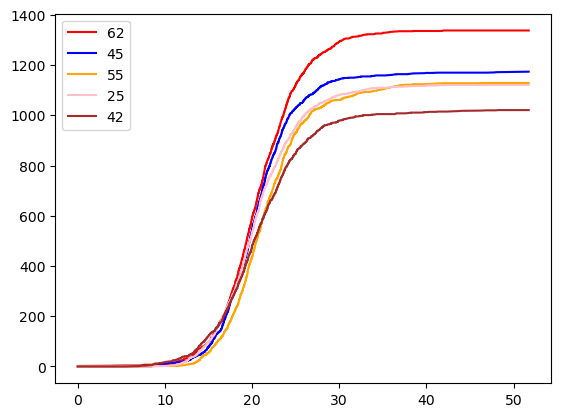

---------------------------
Community: 45
Starting Infected Node: 0
Overall number of infected nodes: 5821
62 1342
45 1188
55 1151
25 1133
42 1008


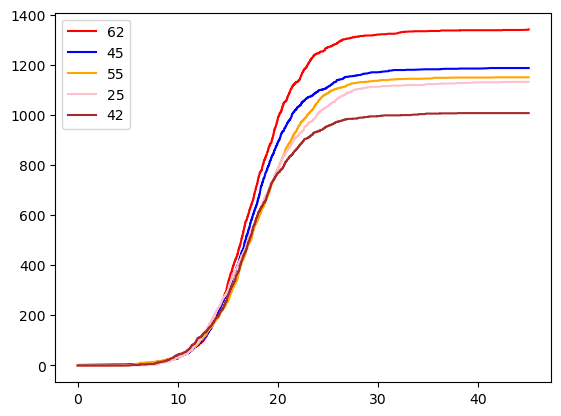

---------------------------
Community: 55
Starting Infected Node: 5
Overall number of infected nodes: 5830
62 1340
45 1194
55 1148
25 1138
42 1011


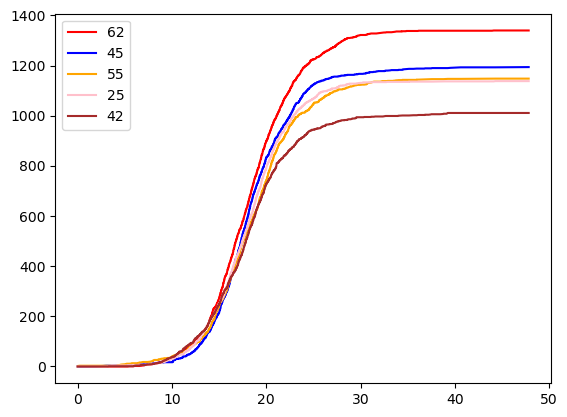

---------------------------
Community: 25
Starting Infected Node: 2
Overall number of infected nodes: 5879
62 1363
45 1192
55 1158
25 1156
42 1011


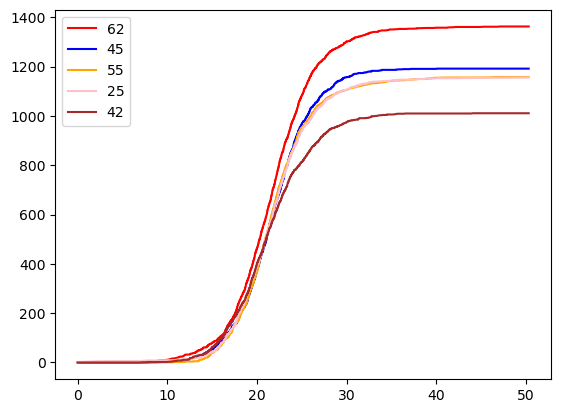

---------------------------
Community: 42
Starting Infected Node: 6
Overall number of infected nodes: 5808
62 1335
45 1183
55 1174
25 1127
42 990


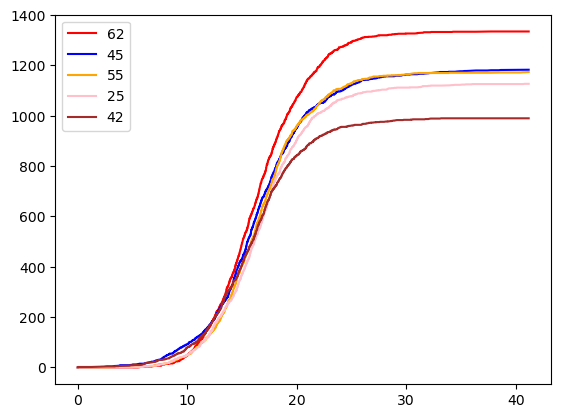

---------------------------


In [11]:
from collections import Counter

comms_colors = ['red', 'blue', 'orange', 'pink', 'brown']
# run the SI model 10 times starting from the most central node
for j, k in rand_node_r:
    for i in range(1):
        infected = [j]
        full_data = EoN.fast_SIR(largest_G_r, beta, gamma, initial_infecteds=infected, return_full_data=True)
        #print(full_data)
        ##full_data.display(time=0.1)
        #print(full_data.transmissions())
        raw = full_data.transmissions()
        #plt.show()
        # print(t)
        # print(len(t))
        # print(S)
        # print(len(S))
        # print(I)
        # print(len(I))
        # print(R)
        # print(len(R))
        time = []
        infected = []
        distance = []
        comms = []
        no_infected = {}
        for m in largest_modularities_r:
            if m == k:
                no_infected[m] = {'num_of_nodes': [1], 'time': [0], 'nodes': [j], 'time_nodes': [0]}
            else:
                no_infected[m] = {'num_of_nodes': [0], 'time': [0], 'nodes': [], 'time_nodes': []}

        for single in raw:
            for m in largest_modularities_r:
                if single[2] in indi_comm_nodes_r[m]:
                    comms.append(m)
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l+1)
                    no_infected[m]['time'].append(single[0])
                    no_infected[m]['nodes'].append(single[2])
                    no_infected[m]['time_nodes'].append(single[0])
                    
                else:
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l)
                    no_infected[m]['time'].append(single[0])
                    
            time.append(single[0])
            infected.append(single[2])
            distance.append(nx.shortest_path_length(largest_G_r, source=infected[0], target=single[2]))
            
                    
        print("Community:", k)
        print("Starting Infected Node:", j)
        print("Overall number of infected nodes:", len(infected))
#         print(distance[:10])
#         print(time[-1])
        comms_recounted = Counter(comms)
#         plt.bar(comms_recounted.keys(), comms_recounted.values())
        for i in range(len(largest_modularities_r)):
            print(largest_modularities_r[i], no_infected[largest_modularities_r[i]]['num_of_nodes'][-1])
            plt.plot(no_infected[largest_modularities_r[i]]['time'], 
                     no_infected[largest_modularities_r[i]]['num_of_nodes'], 
                     comms_colors[i], label=largest_modularities_r[i]
                    )

#         plt.scatter(time, distance, c=comms)
        
        plt.legend()
        plt.show()
        print('---------------------------')

/var/folders/vn/j1xx5ts51r3f8g_stlcz3x_40000gn/T/ipykernel_21500/2679874642.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_sample = random.sample(G_nodes_list, sample_size)


Percentage: 5.0 %
Community: 4
Starting Infected Node: 16164
Overall number of infected nodes: 20209
4 4826
15 4384
19 2312
6 2345
1 1518


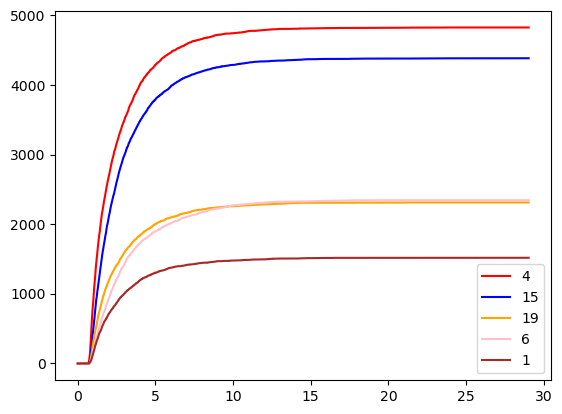

---------------------------
Percentage: 10.0 %
Community: 4
Starting Infected Node: 30844
Overall number of infected nodes: 20034
4 4770
15 4350
19 2349
6 2289
1 1508


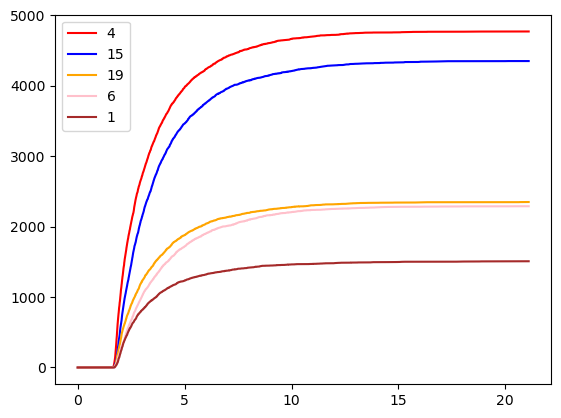

---------------------------
Percentage: 15.0 %
Community: 4
Starting Infected Node: 30072
Overall number of infected nodes: 20532
4 4875
15 4418
19 2430
6 2326
1 1610


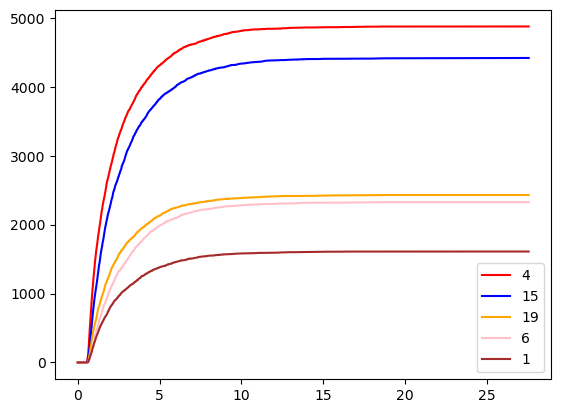

---------------------------
Percentage: 20.0 %
Community: 4
Starting Infected Node: 5154
Overall number of infected nodes: 20432
4 4887
15 4268
19 2406
6 2415
1 1571


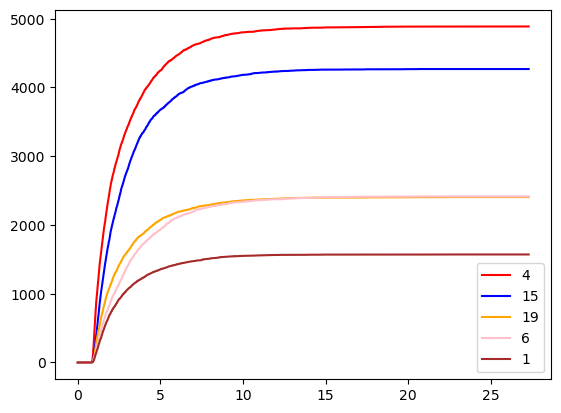

---------------------------
Percentage: 25.0 %
Community: 4
Starting Infected Node: 19307
Overall number of infected nodes: 21007
4 5092
15 4598
19 2421
6 2276
1 1530


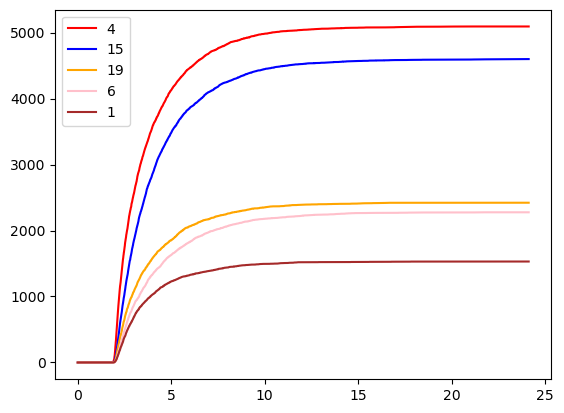

---------------------------


In [36]:
######### TASK 4 - PART A

import random
from collections import Counter

random_percent = [0.05, 0.10, 0.15, 0.20, 0.25]
G_nodes_list = G.nodes()

for p in random_percent:
    
    # calculate p% of the list length
    sample_size = int(len(G_nodes_list) * p)

    # randomly select p% of the data
    random_sample = random.sample(G_nodes_list, sample_size)
    
    largest_G_nodes = largest_G.nodes()
    temp_G = largest_G
    for rs in random_sample:
        if rs in largest_G_nodes:
            temp_G.remove_node(rs)
            
    
    comms_colors = ['red', 'blue', 'orange', 'pink', 'brown']
    k = 4 # largest community
    j = random.sample(list(indi_comm_nodes[4]), 1)
    
    # run the SI model 10 times starting from the most central node
#     for j, k in rand_node:
    for i in range(1):
        infected = j
        full_data = EoN.fast_SIR(temp_G, beta, gamma, initial_infecteds=infected, return_full_data=True)
        #print(full_data)
        ##full_data.display(time=0.1)
        #print(full_data.transmissions())
        raw = full_data.transmissions()
        #plt.show()
        # print(t)
        # print(len(t))
        # print(S)
        # print(len(S))
        # print(I)
        # print(len(I))
        # print(R)
        # print(len(R))
        time = []
        infected = []
        distance = []
        comms = []
        no_infected = {}
        for m in largest_modularities:
            if m == k:
                no_infected[m] = {'num_of_nodes': [1], 'time': [0], 'nodes': infected, 'time_nodes': [0]}
            else:
                no_infected[m] = {'num_of_nodes': [0], 'time': [0], 'nodes': [], 'time_nodes': []}

        for single in raw:
            for m in largest_modularities:
                if single[2] in indi_comm_nodes[m]:
                    comms.append(m)
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l+1)
                    no_infected[m]['time'].append(single[0])
                    no_infected[m]['nodes'].append(single[2])
                    no_infected[m]['time_nodes'].append(single[0])

                else:
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l)
                    no_infected[m]['time'].append(single[0])

            time.append(single[0])
            infected.append(single[2])
            distance.append(nx.shortest_path_length(temp_G, source=infected[0], target=single[2]))


        print("Percentage:", p*100, "%")
        print("Community:", k)
        print("Starting Infected Node:", j[0])
        print("Overall number of infected nodes:", len(infected))
#         print(distance[:10])
#         print(time[-1])
        comms_recounted = Counter(comms)
#         plt.bar(comms_recounted.keys(), comms_recounted.values())
        for i in range(len(largest_modularities)):
            print(largest_modularities[i], no_infected[largest_modularities[i]]['num_of_nodes'][-1])
            plt.plot(no_infected[largest_modularities[i]]['time'], 
                     no_infected[largest_modularities[i]]['num_of_nodes'], 
                     comms_colors[i], label=largest_modularities[i]
                    )

#         plt.scatter(time, distance, c=comms)

        plt.legend()
        plt.show()
        print('---------------------------')

In [65]:
df_e = df.sort_values(by='eigencentrality', ascending=False)
df_e['eigencentrality']

Id
59      1.000000
41      0.883302
166     0.586556
36      0.580925
42      0.545450
          ...   
6873    0.000000
6866    0.000000
6862    0.000000
6861    0.000000
7424    0.000000
Name: eigencentrality, Length: 35776, dtype: float64

In [61]:
# df_e = df.sort_values(by='betweenesscentrality', ascending=False)
# df_e['betweenesscentrality']

In [62]:
# l1_nodes = list(indi_comm_nodes[4])
# l1_nodes.remove(122)
# print(122 in l1_nodes)

False


Int64Index([59, 41, 166, 36, 42], dtype='int64', name='Id')
Percentage: 5.0 %
Community: 4
Starting Infected Node: 320
Overall number of infected nodes: 2
4 2
15 0
19 0
6 0
1 0


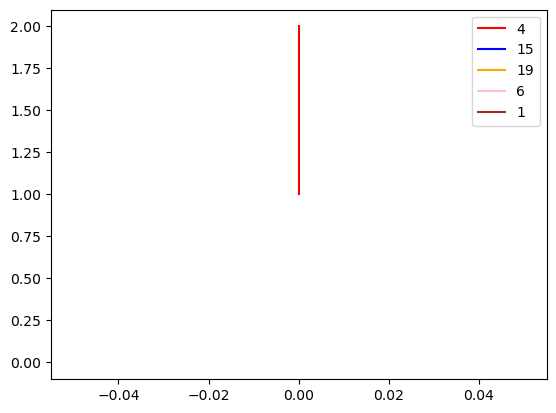

---------------------------
Percentage: 10.0 %
Community: 4
Starting Infected Node: 5119
Overall number of infected nodes: 4
4 3
15 0
19 0
6 0
1 0


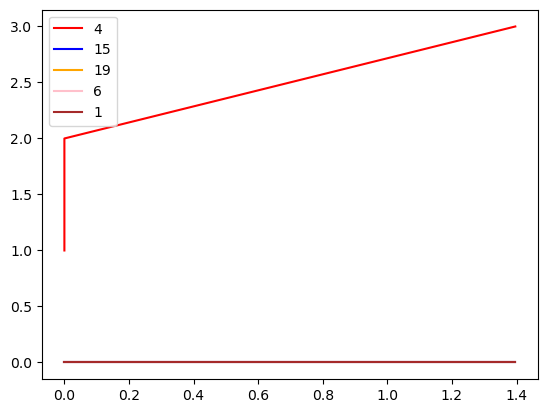

---------------------------
Percentage: 15.0 %
Community: 4
Starting Infected Node: 17369
Overall number of infected nodes: 2
4 2
15 0
19 0
6 0
1 0


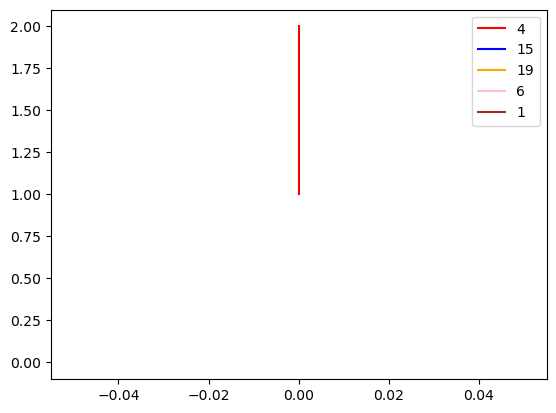

---------------------------
Percentage: 20.0 %
Community: 4
Starting Infected Node: 5766
Overall number of infected nodes: 2
4 2
15 0
19 0
6 0
1 0


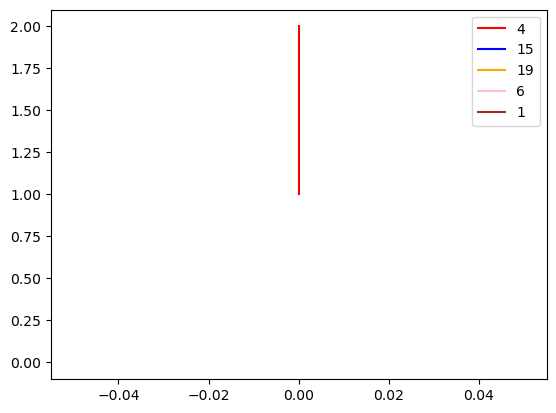

---------------------------
Percentage: 25.0 %
Community: 4
Starting Infected Node: 8669
Overall number of infected nodes: 2
4 2
15 0
19 0
6 0
1 0


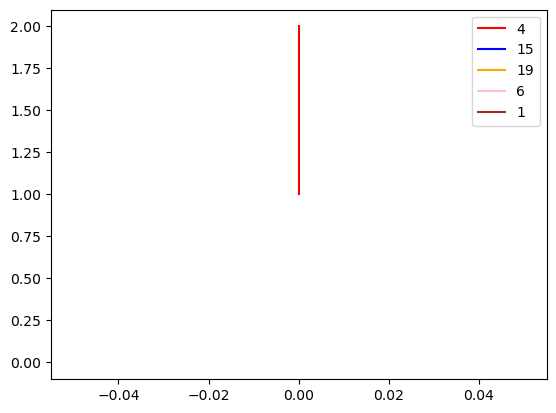

---------------------------


In [73]:
######### TASK 4 - PART B

import random
from collections import Counter

eigen_percent = [0.05, 0.10, 0.15, 0.20, 0.25]
G_nodes_list = df_e.index
print(G_nodes_list[:5])

for p in eigen_percent:
    
    # calculate p% of the list length
    sample_size = int(len(G_nodes_list) * p)

    # randomly select p% of the data
    eigen_nodes_p = G_nodes_list[:sample_size]
    
    largest_G_nodes = largest_G.nodes()
    temp_G = largest_G.copy()
    l1_nodes = list(indi_comm_nodes[4])
    for rs in eigen_nodes_p:
        if rs in largest_G_nodes:
            temp_G.remove_node(rs)
        if rs in l1_nodes:
            l1_nodes.remove(rs)
            
    
    comms_colors = ['red', 'blue', 'orange', 'pink', 'brown']
    k = 4 # largest community
    j = random.sample(list(l1_nodes), 1) # [7903] 
    # run the SI model 10 times starting from the most central node
#     for j, k in rand_node:
    for i in range(1):
        infected = j
        full_data = EoN.fast_SIR(temp_G, beta, gamma, initial_infecteds=infected, return_full_data=True)
        #print(full_data)
        ##full_data.display(time=0.1)
        #print(full_data.transmissions())
        raw = full_data.transmissions()
        #plt.show()
        # print(t)
        # print(len(t))
        # print(S)
        # print(len(S))
        # print(I)
        # print(len(I))
        # print(R)
        # print(len(R))
        time = []
        infected = []
        distance = []
        comms = []
        no_infected = {}
        for m in largest_modularities:
            if m == k:
                no_infected[m] = {'num_of_nodes': [1], 'time': [0], 'nodes': infected, 'time_nodes': [0]}
            else:
                no_infected[m] = {'num_of_nodes': [0], 'time': [0], 'nodes': [], 'time_nodes': []}

        for single in raw:
            for m in largest_modularities:
                if single[2] in indi_comm_nodes[m]:
                    comms.append(m)
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l+1)
                    no_infected[m]['time'].append(single[0])
                    no_infected[m]['nodes'].append(single[2])
                    no_infected[m]['time_nodes'].append(single[0])

                else:
                    l = no_infected[m]['num_of_nodes'][-1]
                    no_infected[m]['num_of_nodes'].append(l)
                    no_infected[m]['time'].append(single[0])

            time.append(single[0])
            infected.append(single[2])
            distance.append(nx.shortest_path_length(temp_G, source=infected[0], target=single[2]))


        print("Percentage:", p*100, "%")
        print("Community:", k)
        print("Starting Infected Node:", j[0])
        print("Overall number of infected nodes:", len(infected))
#         print(distance[:10])
#         print(time[-1])
        comms_recounted = Counter(comms)
#         plt.bar(comms_recounted.keys(), comms_recounted.values())
        for i in range(len(largest_modularities)):
            print(largest_modularities[i], no_infected[largest_modularities[i]]['num_of_nodes'][-1])
            plt.plot(no_infected[largest_modularities[i]]['time'], 
                     no_infected[largest_modularities[i]]['num_of_nodes'], 
                     comms_colors[i], label=largest_modularities[i]
                    )

#         plt.scatter(time, distance, c=comms)

        plt.legend()
        plt.show()
        print('---------------------------')